# Lista #4

## Exercício 5

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 
import seaborn as sns

In [2]:
# Select just a few of these categories, and download the training and testing set.
categories = ['comp.windows.x', 'comp.os.ms-windows.misc', 'misc.forsale', 'rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()
# Naive Bayes classifier for multinomial models.
mnb = MultinomialNB()
# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, mnb)

In [4]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

In [5]:
for i in range(0,4):
    print('%s: %d' % (train.target_names[i], i))

comp.os.ms-windows.misc: 0
comp.windows.x: 1
misc.forsale: 2
rec.autos: 3


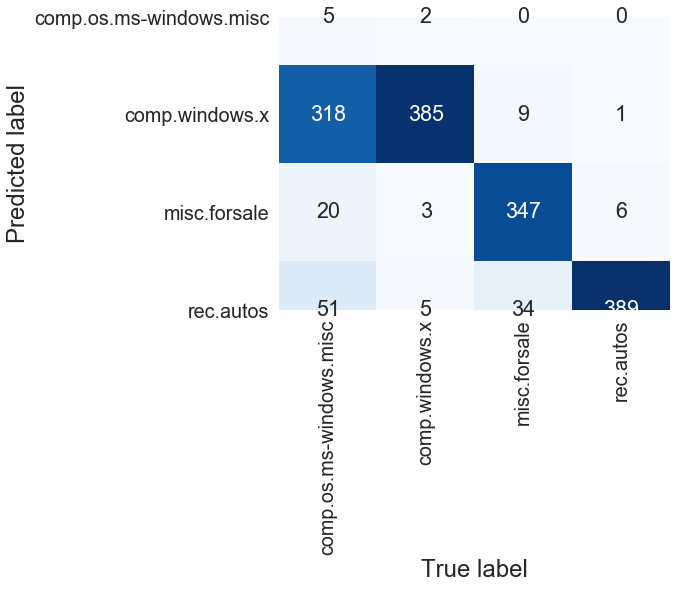

In [6]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()